<a href="https://colab.research.google.com/github/tomeliud/Hypothesis-testing-on-YouTube-viewership-weekend-views-versus-weekday-views-/blob/master/YouTube_Viewership_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

**Tribe Digital Agency** has a significant following on Youtube. We would like to maximise our Youtube digital platform as a means of marketing through uploading product videos. Using the Youtube data on popular youtubers, we would like to know when it’s optimum to publish our videos so as to increase our viewership, brand awareness, social engagement and business development.

**Research Question**

We would like to know when it’s optimum to publish our videos so as to increase our viewership, brand awareness, social engagement and business development.

**Metric of success**

We measure our success through answering the following questions:

*   Do we reject our null hypothesis in favour of the alternative.

*   Which were the common words used in titles of videos that went on to trend.

*   Is there a correlation between the number of views and the number of likes of trending videos
*   Approximately how many characters were in the titles of videos that went on to trend.



**Hypothesis statement**

*Null Hypothesis*
> **Ho**:Videos released over the weekend have greater views on average than the ones released on weekdays

*Alternative Hypothesis*
> **Ha**: There’s no difference in viewership between videos released on weekdays and weekends

**The source of the dataset**


> [[ Link ]](https://www.kaggle.com/datasnaek/youtube-new?select=USvideos.csv)






## Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# reading in the file using pandas read_csv function
df = pd.read_csv('youtube-data.csv')

# viewing the top 5 data
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [ ]:
# viewing the bottom 5 data
df.tail()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...
40948,ooyjaVdt-jA,18.14.06,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,20,2018-05-17T17:09:38.000Z,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,144795,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...


In [ ]:
# getting the shape of the dataframe
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 40949 rows and 16 columns.


In [ ]:
# unique columns
df.nunique()

video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64

In [ ]:
# Accessing the data to know more about it.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [ ]:
# summary statistical description of our dataset
pd.options.display.float_format = "{:.3f}".format # supress the scientific format
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000,40949.000,40949.000,40949.000,40949.000
mean,19.972,2360784.638,74266.702,3711.401,8446.804
std,7.568,7394113.760,228885.338,29029.706,37430.487
min,1.000,549.000,0.000,0.000,0.000
25%,17.000,242329.000,5424.000,202.000,614.000
50%,24.000,681861.000,18091.000,631.000,1856.000
75%,25.000,1823157.000,55417.000,1938.000,5755.000
max,43.000,225211923.000,5613827.000,1674420.000,1361580.000


## Data Cleaning

In [ ]:
# Checking for any duplicates in the dataset
dups=df.duplicated().any()
dups

True

In [ ]:
# Checking the dataset for any null values
df.isnull().any()

video_id                  False
trending_date             False
title                     False
channel_title             False
category_id               False
publish_time              False
tags                      False
views                     False
likes                     False
dislikes                  False
comment_count             False
thumbnail_link            False
comments_disabled         False
ratings_disabled          False
video_error_or_removed    False
description                True
dtype: bool

In [ ]:
# filling in the null values from the description
df["description"] = df["description"].fillna(value="")

In [ ]:
# checking if the null have been sorted.
df.isnull().any()

video_id                  False
trending_date             False
title                     False
channel_title             False
category_id               False
publish_time              False
tags                      False
views                     False
likes                     False
dislikes                  False
comment_count             False
thumbnail_link            False
comments_disabled         False
ratings_disabled          False
video_error_or_removed    False
description               False
dtype: bool

In [ ]:
# Create a datetime object from the year, month and day column as well as the hour and minute column
# Creating new columns for Date and Time using python datetime object.
# pd.to_datetime --> Convert argument to datetime
#
df['publish_time'] = df['publish_time'].apply(pd.to_datetime)
df['date'] = [d.date() for d in df['publish_time']]
df['time'] = [t.time() for t in df['publish_time']]
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,date,time
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,17:13:01
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13,07:30:00
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-12,19:05:24
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,2017-11-13,11:00:04
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017-11-12,18:01:41


In [ ]:
# creating three new columns for hours, minutes and seconds respectively.
# create a list of the new columns ['hr','min','sec'].
# the splitting happens occurs on the time column.
# pandas.Series.astype --> casts a pandas object to a specified dtype dtype
# pandas.Series.str.split --> Splits the string in the Series/Index from the beginning, at the specified delimiter string
# expand == If True, return DataFrame/MultiIndex expanding dimensionality
#
df[['hr','min','sec']] = df['time'].astype(str).str.split(':', expand=True).astype(int)
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,date,time,hr,min,sec
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,17:13:01,17,13,1
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13,07:30:00,7,30,0
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-12,19:05:24,19,5,24
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,2017-11-13,11:00:04,11,0,4
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017-11-12,18:01:41,18,1,41


In [ ]:
# creating a weekday column to represent the days in numeric form.
# using the lambda anonymous function
# using the python datetime.weekday() --> returns the day of the week as an integer, where Monday is 0 and Sunday is 6.
#
df['weekday'] = df['date'].apply (lambda x:x.weekday() )
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,date,time,hr,min,sec,weekday
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,17:13:01,17,13,1,0
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13,07:30:00,7,30,0,0
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-12,19:05:24,19,5,24,6
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,2017-11-13,11:00:04,11,0,4,0
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017-11-12,18:01:41,18,1,41,6


In [ ]:
# chronologically mapping the numeric day of the week with it's respective name
# using a dictionary.
#
week = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['weekday'] = df['weekday'].map(week)
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,date,time,hr,min,sec,weekday
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,17:13:01,17,13,1,Monday
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13,07:30:00,7,30,0,Monday
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-12,19:05:24,19,5,24,Sunday
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,2017-11-13,11:00:04,11,0,4,Monday
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017-11-12,18:01:41,18,1,41,Sunday


In [ ]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,date,time,hr,min,sec,weekday
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,17:13:01,17,13,1,Monday
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13,07:30:00,7,30,0,Monday
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-12,19:05:24,19,5,24,Sunday
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,2017-11-13,11:00:04,11,0,4,Monday
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017-11-12,18:01:41,18,1,41,Sunday


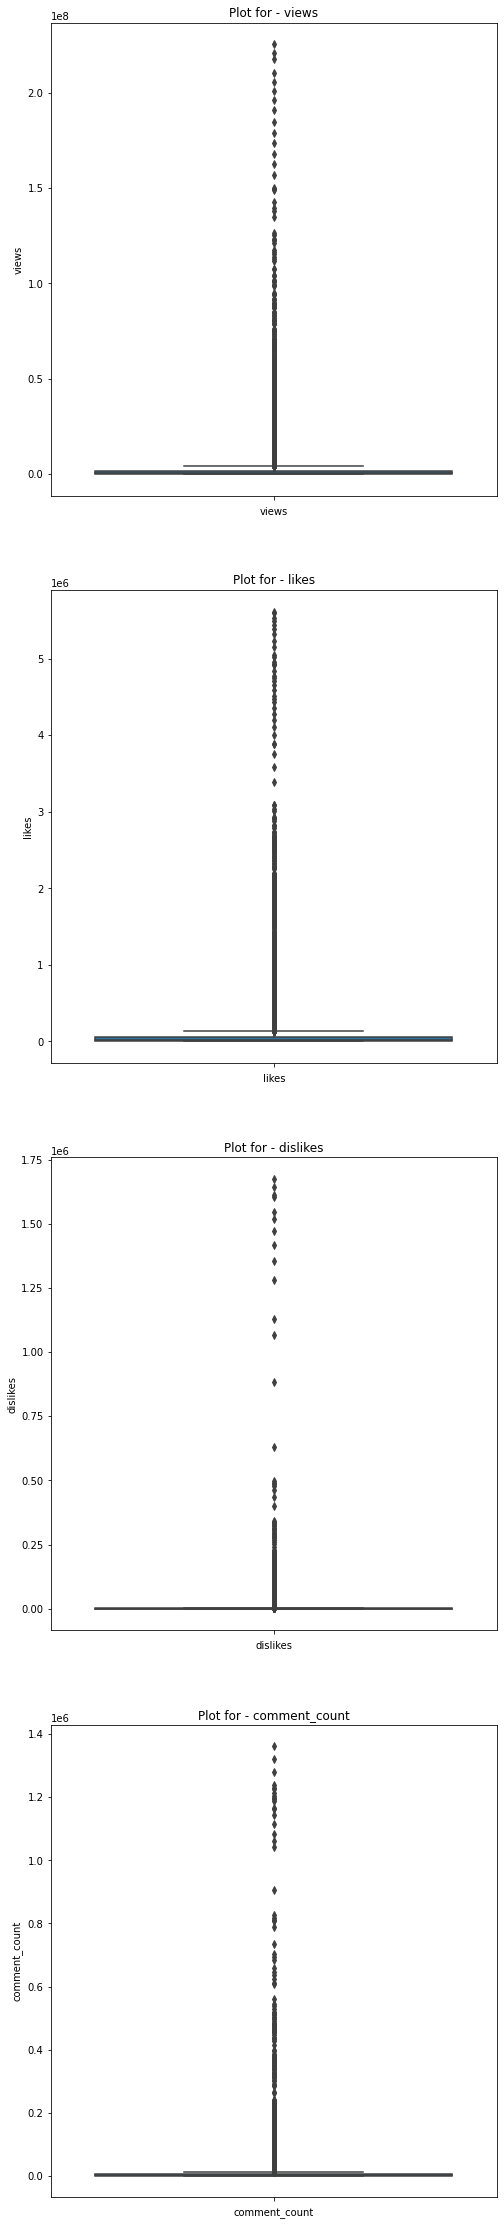

In [ ]:
# findining the outliers within the dataset.
# using the numerical columns.
# in statistics, an outlier is an observation point that is distant from other observations.
#
select=['views','likes','dislikes','comment_count']
fig, ax = plt.subplots(len(select), figsize=(8,40))
for i, values in enumerate(select):

    sns.boxplot(y=df[values], ax=ax[i])
    ax[i].set_title(f'Plot for - {values}')
    ax[i].set_xlabel(values)
plt.show()

In [ ]:
# dealing with outliers
#
#
col_names_1 = df[['views','likes','dislikes','comment_count']]
from scipy import stats
z = np.abs(stats.zscore(col_names_1))
print(z)

[[2.18069451e-01 7.31366498e-02 2.56774902e-02 2.00566132e-01]
 [7.84395153e-03 1.00131260e-01 8.38668102e-02 1.13710738e-01]
 [1.12340644e-01 3.13550769e-01 5.60673604e-02 7.10134838e-03]
 ...
 [1.75051329e-01 1.14463524e-01 9.22997157e-02 1.19016835e-01]
 [4.46310236e-01 5.18564220e-01 2.98112374e-02 1.23996596e-01]
 [1.07456169e+00 1.23562196e+00 7.20872456e+00 3.64274879e+00]]


In [ ]:
# Confirming that our outliers have been dropped from the dataset.
#
df_o = col_names_1[(z < 3).all(axis=1)]
print(f"Previous dataframe size : {col_names_1.shape[0]}")
print(f"New dataframe size: {df_o.shape[0]}")

Previous dataframe size : 40949
New dataframe size: 40086


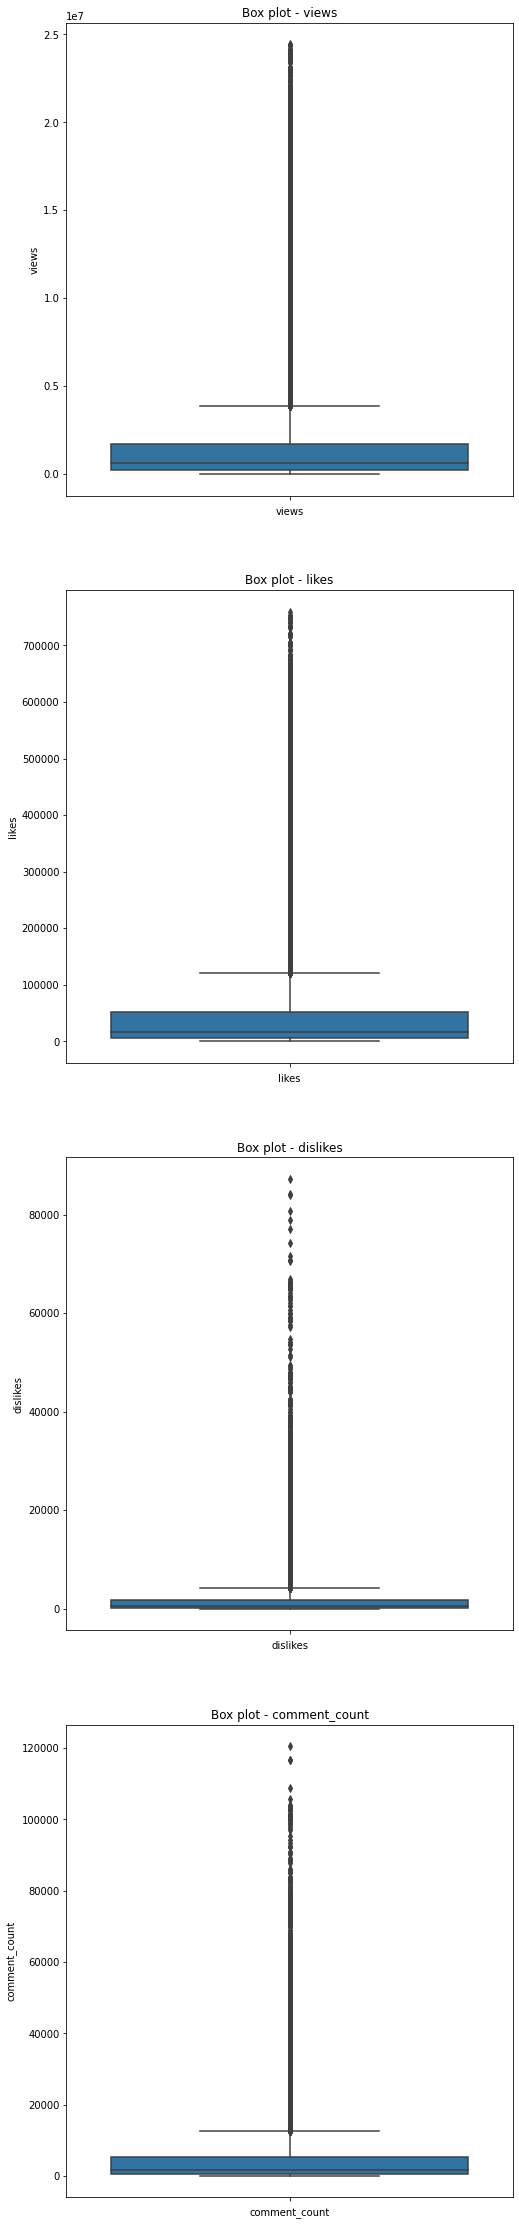

In [ ]:
# checking if outliers have been removed
columns=['views','likes','dislikes','comment_count']
fig, ax = plt.subplots(len(columns), figsize=(8,40))
for i, values in enumerate(columns):
    sns.boxplot(y=df_o[values], ax=ax[i])
    ax[i].set_title(f'Box plot - {values}')
    ax[i].set_xlabel(values)
plt.show()

In [ ]:
# select columns to perform IQR on.
# convert the columns into floats (.astype(float))
#
df[['views','likes','dislikes','comment_count']] = df[['views','likes','dislikes','comment_count']].astype(float)

In [ ]:
# creating a new variable with the columns that are needed, numeric mostly.
df_new=df[['views','likes','dislikes','comment_count', 'category_id', 'weekday','date', 'time', 'hr', 'min', 'sec']]
df_new.head()

,views,likes,dislikes,comment_count,category_id,weekday,date,time,hr,min,sec
0,748374.000,57527.000,2966.000,15954.000,22,Monday,2017-11-13,17:13:01,17,13,1
1,2418783.000,97185.000,6146.000,12703.000,24,Monday,2017-11-13,07:30:00,7,30,0
2,3191434.000,146033.000,5339.000,8181.000,23,Sunday,2017-11-12,19:05:24,19,5,24
3,343168.000,10172.000,666.000,2146.000,24,Monday,2017-11-13,11:00:04,11,0,4
4,2095731.000,132235.000,1989.000,17518.000,24,Sunday,2017-11-12,18:01:41,18,1,41


In [ ]:
# looking for and dropping any duplicated data.
df_new.duplicated().sum()
df_new.drop_duplicates()

,views,likes,dislikes,comment_count,category_id,weekday,date,time,hr,min,sec
0,748374.000,57527.000,2966.000,15954.000,22,Monday,2017-11-13,17:13:01,17,13,1
1,2418783.000,97185.000,6146.000,12703.000,24,Monday,2017-11-13,07:30:00,7,30,0
2,3191434.000,146033.000,5339.000,8181.000,23,Sunday,2017-11-12,19:05:24,19,5,24
3,343168.000,10172.000,666.000,2146.000,24,Monday,2017-11-13,11:00:04,11,0,4
4,2095731.000,132235.000,1989.000,17518.000,24,Sunday,2017-11-12,18:01:41,18,1,41
...,...,...,...,...,...,...,...,...,...,...,...
40944,1685609.000,38160.000,1385.000,2657.000,15,Friday,2018-05-18,13:00:04,13,0,4
40945,1064798.000,60008.000,382.000,3936.000,22,Friday,2018-05-18,01:00:06,1,0,6
40946,1066451.000,48068.000,1032.000,3992.000,24,Friday,2018-05-18,17:34:22,17,34,22
40947,5660813.000,192957.000,2846.000,13088.000,1,Thursday,2018-05-17,17:00:04,17,0,4


In [ ]:
# checking for anomalies using the IQRs
#
#
q1=df_new.quantile(0.25) # Q1 
q3=df_new.quantile(0.75) # Q3
iqr=q3-q1 # interquatile range
df_new = df_new[~((df_new < (q1 - 1.5 * iqr)) | (df_new > (q3 + 1.5 * iqr))).any(axis=1)]

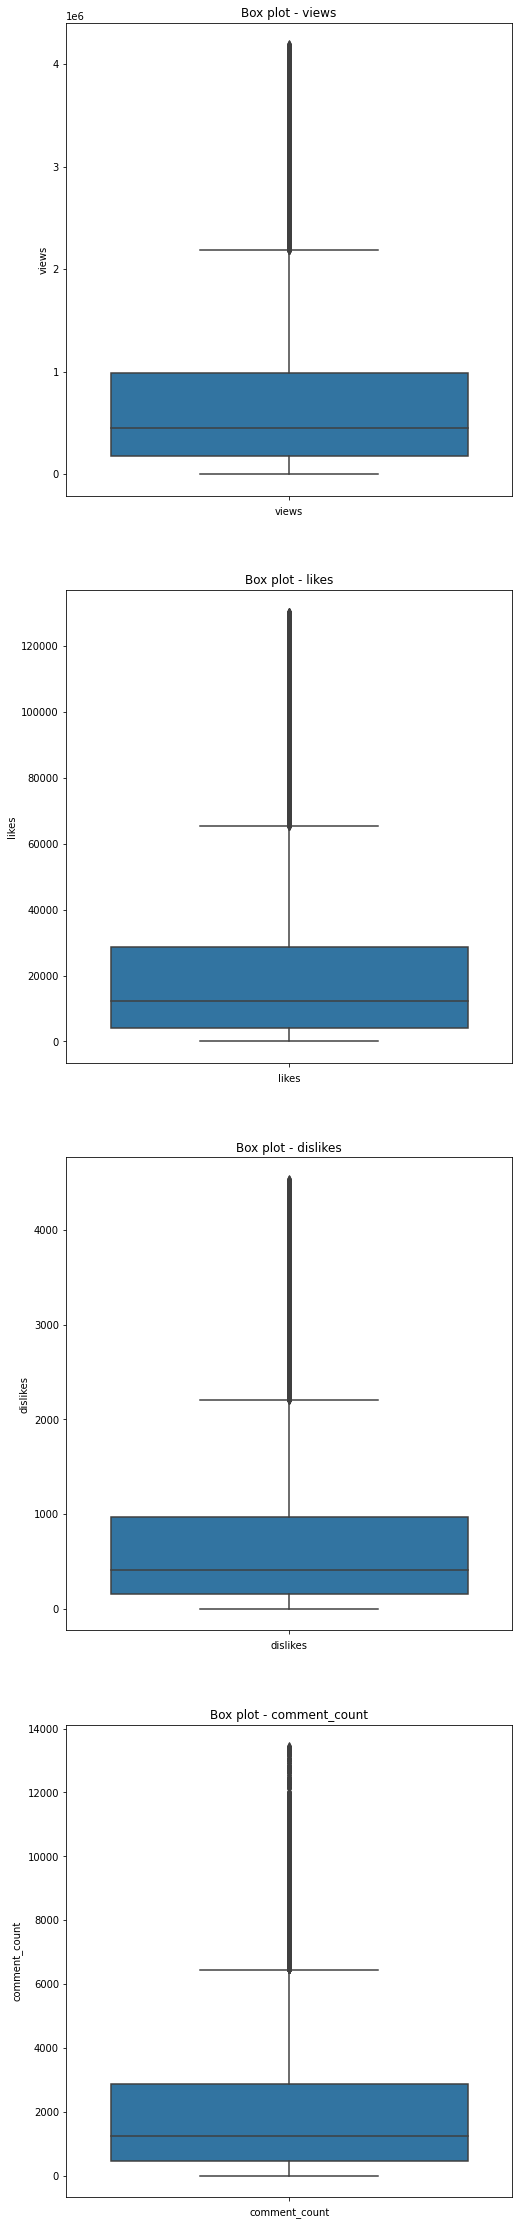

In [ ]:
# checking if outliers have been removed
columns=['views','likes','dislikes','comment_count']
fig, ax = plt.subplots(len(columns), figsize=(8,40))
for i, values in enumerate(columns):
    sns.boxplot(y=df_new[values], ax=ax[i])
    ax[i].set_title(f'Box plot - {values}')
    ax[i].set_xlabel(values)
plt.show()

In [ ]:
# cleaning and dropping what's not necessary.
#
#
#df_export = df.copy()
#df_export.drop(['thumbnail_link','tags','title','video_id',
 #            'comments_disabled','ratings_disabled','video_error_or_removed',
 #            'description','video_id','title', 'contains_capitalized'],axis=1,inplace=True)

In [ ]:
#df_export.head()

In [ ]:
# exporting the dataset
#df_export.to_csv('clean_export_data.csv',index=False)

## Exploratory Analysis

### Univariate Analysis

In [ ]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,date,time,hr,min,sec,weekday
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374.000,57527.000,2966.000,15954.000,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,17:13:01,17,13,1,Monday
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783.000,97185.000,6146.000,12703.000,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13,07:30:00,7,30,0,Monday
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.000,146033.000,5339.000,8181.000,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-12,19:05:24,19,5,24,Sunday
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168.000,10172.000,666.000,2146.000,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,2017-11-13,11:00:04,11,0,4,Monday
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731.000,132235.000,1989.000,17518.000,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017-11-12,18:01:41,18,1,41,Sunday


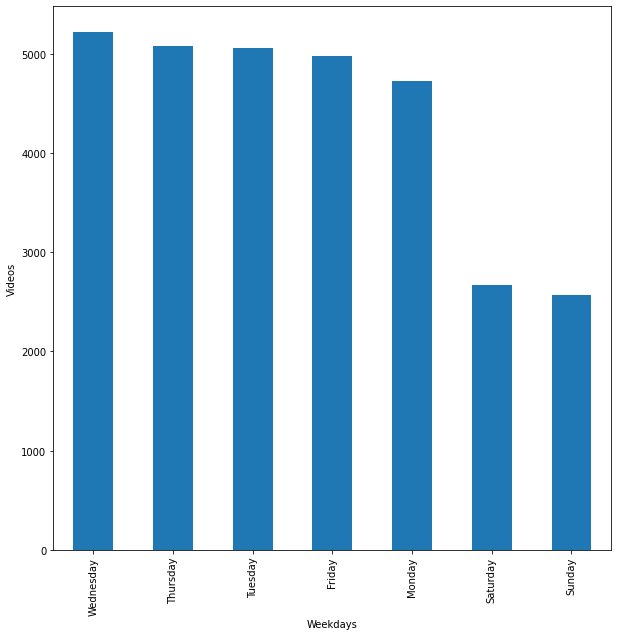

In [ ]:
# plot showing the most popular days trending videos. 
plt.figure(figsize=(10,10))
plt.xlabel('Weekdays')
plt.ylabel('Videos')
df_new['weekday'].value_counts().plot.bar()

# The most popular time to post a video is mid week

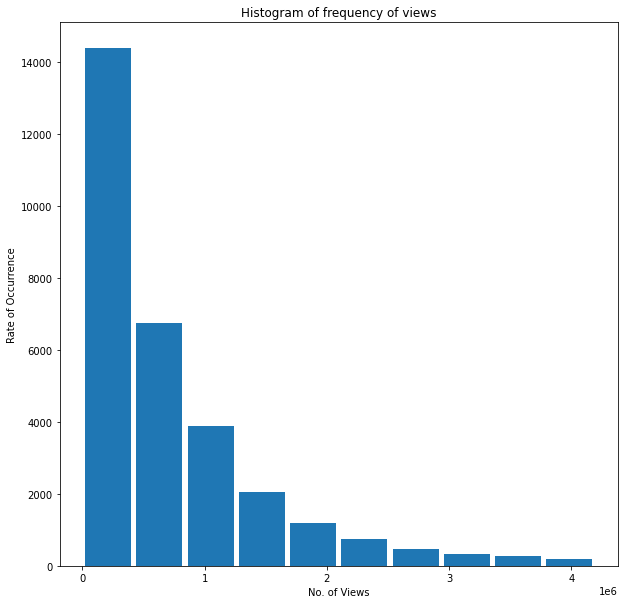

In [ ]:
# bar histogram for video likes
df_views = df_new['views']

plt.figure(figsize=(10,10))
plt.hist(df_views, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('No. of Views')
plt.ylabel('Rate of Occurrence')
plt.title('Histogram of frequency of views')
plt.show()

<Figure size 720x720 with 0 Axes>

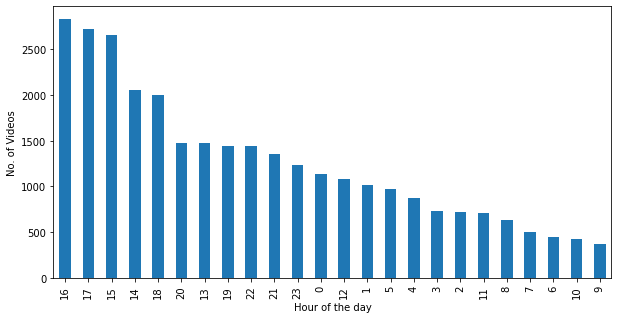

In [ ]:
# hourly frequency upload times for videos in the United states in 24 hour format
#
plt.figure(figsize=(10,10))
plt.figure(figsize=(10,5)) 
plt.xlabel('Hour of the day')
plt.ylabel('No. of Videos')
df_new['hr'].value_counts().plot.bar()

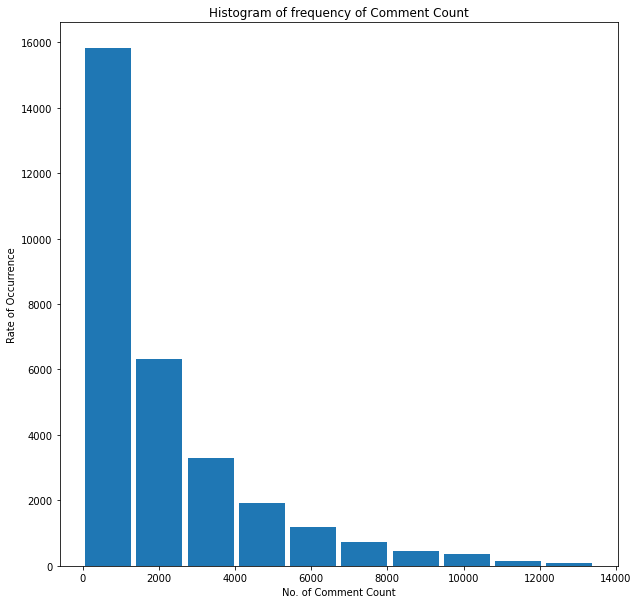

In [ ]:
# bar histogram for video comments count col
df_comm = df_new['comment_count']

plt.figure(figsize=(10,10))
plt.hist(df_comm, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('No. of Comment Count')
plt.ylabel('Rate of Occurrence')
plt.title('Histogram of frequency of Comment Count')
plt.show()

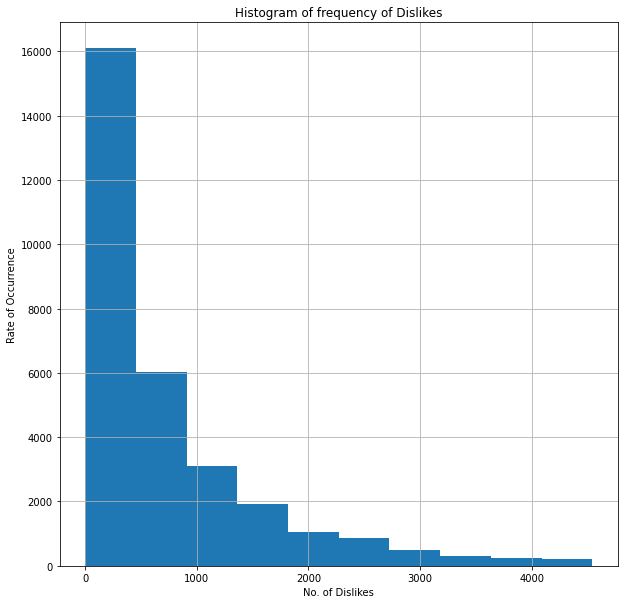

In [ ]:
# bar histogram for video dislikes
df_dislikes = df_new['dislikes']

plt.figure(figsize=(10,10))
df_new['dislikes'].hist()
plt.xlabel('No. of Dislikes')
plt.ylabel('Rate of Occurrence')
plt.title('Histogram of frequency of Dislikes')
plt.show()

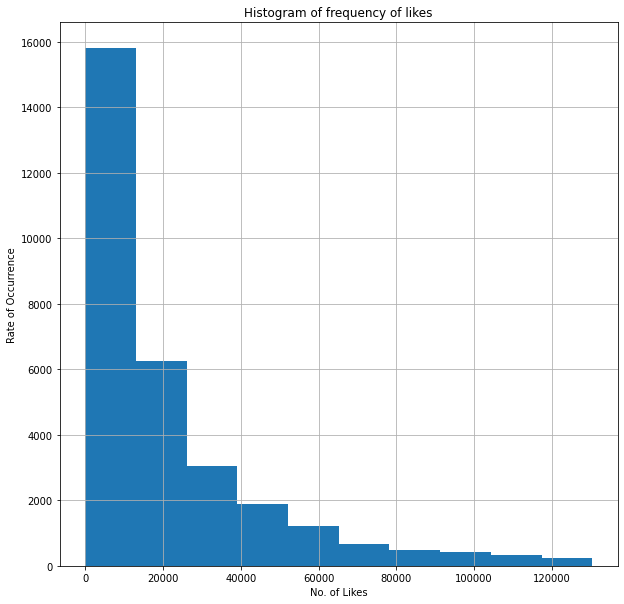

In [ ]:
# bar histogram for video likes
df_likes = df_new['likes']

plt.figure(figsize=(10,10))
df_new['likes'].hist()
plt.xlabel('No. of Likes')
plt.ylabel('Rate of Occurrence')
plt.title('Histogram of frequency of likes')
plt.show()

In [ ]:
df_new.head()

,views,likes,dislikes,comment_count,category_id,weekday,date,time,hr,min,sec
3,343168.000,10172.000,666.000,2146.000,24,Monday,2017-11-13,11:00:04,11,0,4
5,119180.000,9763.000,511.000,1434.000,28,Monday,2017-11-13,19:07:23,19,7,23
6,2103417.000,15993.000,2445.000,1970.000,24,Sunday,2017-11-12,05:37:17,5,37,17
7,817732.000,23663.000,778.000,3432.000,28,Sunday,2017-11-12,21:50:37,21,50,37
9,256426.000,12654.000,1363.000,2368.000,25,Monday,2017-11-13,13:45:16,13,45,16


In [ ]:
# measures of central tendancies
# mean
#

print(f'The average number of likes is: {df_likes.mean()}')
print(f'The average number of dislikes is: {df_dislikes.mean()}')
print(f'The average number of comments is: {df_comm.mean()}')
print('-----------------------------------------------------------------')
#
# mode

print(f'The median number for likes is: {df_likes.median()}')
print(f'The median number for dislikes is: {df_dislikes.median()}')
print(f'The median number for comments is: {df_comm.median()}')
print('-----------------------------------------------------------------')
#
# median

print(f'The mode number for likes is: {df_likes.mode()}')
print(f'The mode number for dislikes is: {df_dislikes.mode()}')
print(f'The mode number for comments is: {df_comm.mode()}')
print('-----------------------------------------------------------------')

The average number of likes is: 21199.136803194826
The average number of dislikes is: 721.4190897389353
The average number of comments is: 2085.4447671540315
-----------------------------------------------------------------
The median number for likes is: 12133.0
The median number for dislikes is: 407.0
The median number for comments is: 1252.0
-----------------------------------------------------------------
The mode number for likes is: 0   0.000
dtype: float64
The mode number for dislikes is: 0   0.000
dtype: float64
The mode number for comments is: 0   0.000
dtype: float64
-----------------------------------------------------------------


In [ ]:
sns.boxplot(df_new['likes'], showmeans=True)

In [ ]:
sns.boxplot(df_new['dislikes'], showmeans=True)

In [ ]:
sns.boxplot(df_new['comment_count'], showmeans=True)

In [ ]:
sns.boxplot(df_new['views'], showmeans=True)

In [ ]:
print('Average views a trending video gets is '+ str(df_new['views'].mean()))

### Bivariate Analysis

In [ ]:
df_new.head()

,views,likes,dislikes,comment_count,category_id,weekday,date,time,hr,min,sec
3,343168.000,10172.000,666.000,2146.000,24,Monday,2017-11-13,11:00:04,11,0,4
5,119180.000,9763.000,511.000,1434.000,28,Monday,2017-11-13,19:07:23,19,7,23
6,2103417.000,15993.000,2445.000,1970.000,24,Sunday,2017-11-12,05:37:17,5,37,17
7,817732.000,23663.000,778.000,3432.000,28,Sunday,2017-11-12,21:50:37,21,50,37
9,256426.000,12654.000,1363.000,2368.000,25,Monday,2017-11-13,13:45:16,13,45,16


In [ ]:
# dataset colletion years
# return a series containing counts of unique values.
# the normalize parameter returns, if True, an the relative frequencies of the unique values.
# % = (relative frequency / total number)  * 100
#
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

2018   0.766
2017   0.234
Name: trending_date, dtype: float64

We can see that the dataset was collected in 2017 and 2018 with 77% of it in 2018 and 23% in 2017.

Text(0, 0.5, 'Likes')

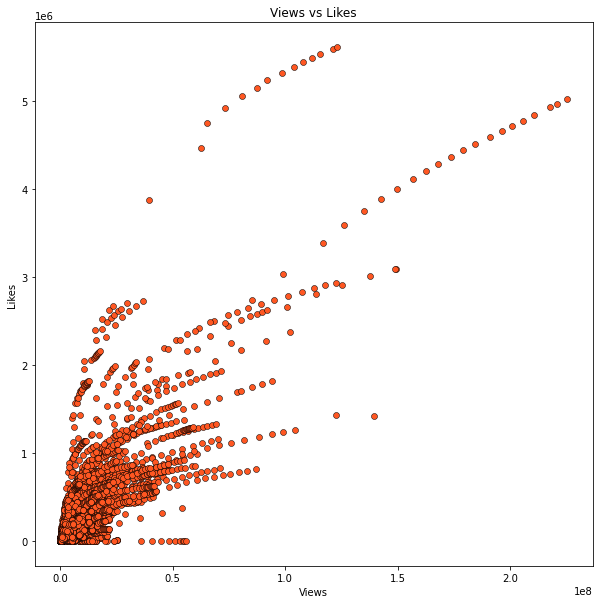

In [ ]:
# scatter plot for views vs likes
# plt.scatter(df_new['views'], df_new['likes'])
#
plt.figure(figsize=(10,10))
plt.scatter(x=df['views'], y=df['likes'], color='#FF5722', edgecolors="#000000", linewidths=0.5)
plt.title('Views vs Likes')
plt.xlabel('Views')
plt.ylabel('Likes')

You can see that views and likes are truly positively correlated, as one increases, the other increases too.

Text(0, 0.5, 'Dislikes')

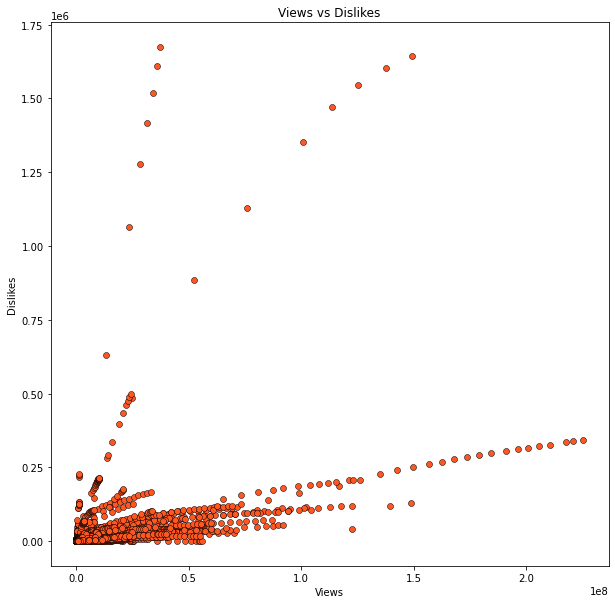

In [ ]:
# scatter plot for views vs dislikes
#plt.scatter(df_new['views'], df_new['dislikes'])
#
plt.figure(figsize=(10,10))
plt.scatter(x=df['views'], y=df['dislikes'], color='#FF5722', edgecolors="#000000", linewidths=0.5)
plt.title('Views vs Dislikes')
plt.xlabel('Views')
plt.ylabel('Dislikes')

Text(0, 0.5, 'Comments Count')

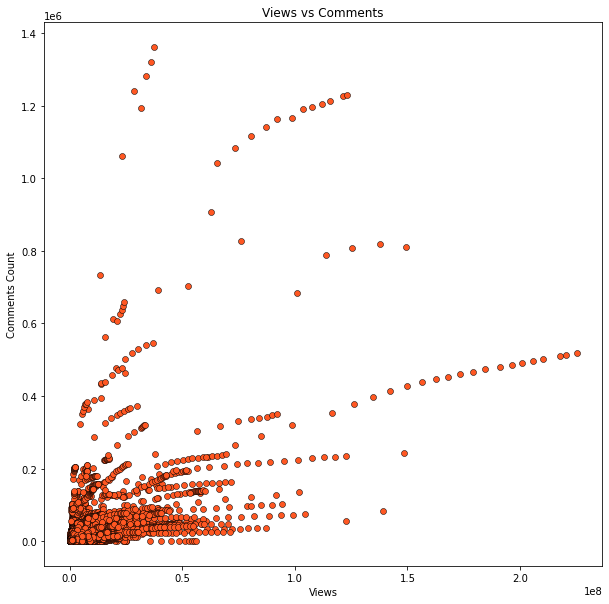

In [ ]:
# scatter plot for views vs comments
# plt.scatter(df_new['views'], df_new['comment_count'])
#
plt.figure(figsize=(10,10))
plt.scatter(x=df['views'], y=df['comment_count'], color='#FF5722', edgecolors="#000000", linewidths=0.5)
plt.title('Views vs Comments')
plt.xlabel('Views')
plt.ylabel('Comments Count')

In [ ]:
# calculating the length of the titles
df["title_length"] = df["title"].apply(lambda x: len(x))

Text(0, 0.5, 'Title Length')

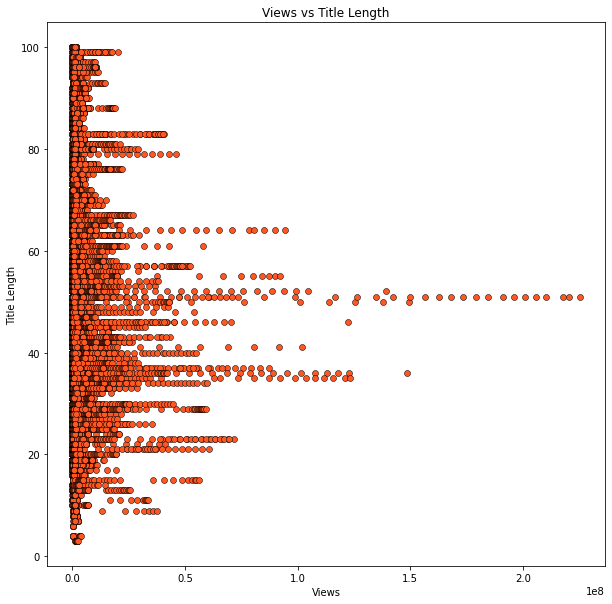

In [ ]:
# plotting the title length vs views
#
#
plt.figure(figsize=(10,10))
plt.scatter(x=df['views'], y=df['title_length'], color='#FF5722', edgecolors="#000000", linewidths=0.5)
plt.title('Views vs Title Length')
plt.xlabel('Views')
plt.ylabel('Title Length')

Text(0, 0.5, 'No. of Videos')

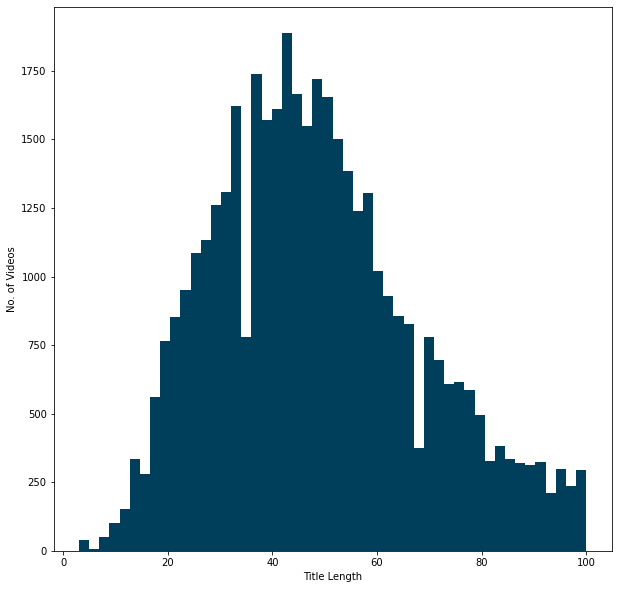

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(df["title_length"], kde=False, rug=False, 
                 color='#003f5c', hist_kws={'alpha': 1})
plt.xlabel('Title Length')
plt.ylabel('No. of Videos')

We can see that title-length distribution resembles a normal distribution, where most videos have title lengths between 30 and 60 character approximately.

In [ ]:
# Correlation coefficients between -.20 and .20 are generally considered weak, 
# between .20 and .50 (positive or negative) are considered moderate, 
# and above .50 (positive or negative) are considered strong. 

In [ ]:
# checking the relation coefficient between the number of view and likes
#
# Calculating the pearson coefficient
pearson_coeff = df_new['views'].corr(df_new['likes'], method="pearson") 
print(pearson_coeff)

# from the above correlation, I can conclude that likes and views are strongly correlated. (0.68)

0.6869987021159589


In [ ]:
# checking the relation coefficient between the number of view and dislikes
#
# Calculating the pearson coefficient
pearson_coeff = df_new['views'].corr(df_new['dislikes'], method="pearson") 
print(pearson_coeff)

# from the above correlation, I can conclude that dislikes and views are strongly correlated. (0.63)

0.635444985349258


In [ ]:
# checking the relation coefficient between the number of view and comments
#
# Calculating the pearson coefficient
pearson_coeff = df_new['views'].corr(df_new['comment_count'], method="pearson") 
print(pearson_coeff)

# from the above correlation, I can conclude that comment count and views are strongly correlated. (0.57)

0.5751247695963664


In [ ]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,date,time,hr,min,sec,weekday,title_length
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374.000,57527.000,2966.000,15954.000,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,17:13:01,17,13,1,Monday,34
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783.000,97185.000,6146.000,12703.000,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13,07:30:00,7,30,0,Monday,62
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.000,146033.000,5339.000,8181.000,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-12,19:05:24,19,5,24,Sunday,53
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168.000,10172.000,666.000,2146.000,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,2017-11-13,11:00:04,11,0,4,Monday,32
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731.000,132235.000,1989.000,17518.000,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017-11-12,18:01:41,18,1,41,Sunday,24


In [ ]:
# calculating the like, dislike and comment rates
df['like_rate'] = df['likes'] / df['views'] * 100
df['dislike_rate'] = df['dislikes'] / df['views'] * 100
df['comment_rate'] = df['comment_count'] / df['views'] * 100

In [ ]:
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,date,time,hr,min,sec,weekday,title_length,like_rate,dislike_rate,comment_rate
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374.000,57527.000,2966.000,15954.000,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,17:13:01,17,13,1,Monday,34,7.687,0.396,2.132
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783.000,97185.000,6146.000,12703.000,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13,07:30:00,7,30,0,Monday,62,4.018,0.254,0.525
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.000,146033.000,5339.000,8181.000,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-12,19:05:24,19,5,24,Sunday,53,4.576,0.167,0.256


In [ ]:
df_new.head()

,views,likes,dislikes,comment_count,category_id,weekday,date,time,hr,min,sec
3,343168.000,10172.000,666.000,2146.000,24,Monday,2017-11-13,11:00:04,11,0,4
5,119180.000,9763.000,511.000,1434.000,28,Monday,2017-11-13,19:07:23,19,7,23
6,2103417.000,15993.000,2445.000,1970.000,24,Sunday,2017-11-12,05:37:17,5,37,17
7,817732.000,23663.000,778.000,3432.000,28,Sunday,2017-11-12,21:50:37,21,50,37
9,256426.000,12654.000,1363.000,2368.000,25,Monday,2017-11-13,13:45:16,13,45,16


Text(0.5, 1.0, 'VIEWS DISTRIBUITION')

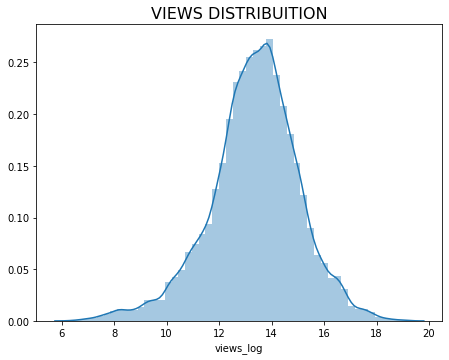

In [ ]:
# Looking if Views, likes, dislikes and comment counts have a normal distribuition.
#
# np.log ---> Natural logarithm, element-wise.
# The natural logarithm log is the inverse of the exponential function, 
# so that log(exp(x)) = x. The natural logarithm is logarithm in base e.
# this mathematical function helps user to calculate Natural logarithm of x where x belongs to all the input array elements.
#
#
# since I'll be using views I wanted to check if it's a normal distribution.
df['views_log'] = np.log(df['views'] + 1)

plt.figure(figsize = (16,12))

plt.subplot(221)
v1 = sns.distplot(df['views_log'])
v1.set_title("VIEWS DISTRIBUITION", fontsize=16)



In [ ]:
print(df['likes'])
print('----------------------------')
print(df['likes_log'])

0        57527.000
1        97185.000
2       146033.000
3        10172.000
4       132235.000
           ...    
40944    38160.000
40945    60008.000
40946    48068.000
40947   192957.000
40948   357079.000
Name: likes, Length: 40949, dtype: float64
----------------------------
0       10.960
1       11.484
2       11.892
3        9.227
4       11.792
         ...  
40944   10.550
40945   11.002
40946   10.780
40947   12.170
40948   12.786
Name: likes_log, Length: 40949, dtype: float64


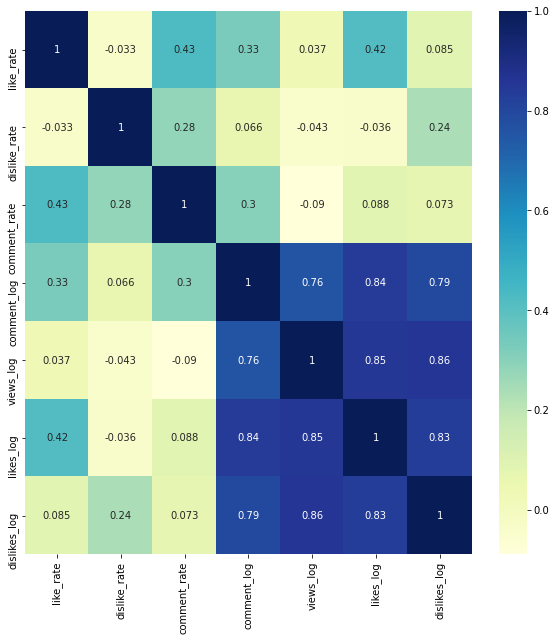

In [ ]:
# Correlation coefficients between -.20 and .20 are generally considered weak, 
# between .20 and .50 (positive or negative) are considered moderate, 
# and above .50 (positive or negative) are considered strong. 
#
# heatmap correlation matrix
# analysing the correlation matrix of the numeric variables.
#
#
plt.figure(figsize = (10,10))

# Verifing the correlation of each value
sns.heatmap(df[['like_rate', 'dislike_rate', 'comment_rate', 'comment_log',
         'views_log','likes_log','dislikes_log']].corr(), cmap="YlGnBu",annot=True)
plt.show()

The correlation table above says that views and likes are strongly and positively correlated (0.85). This claim is also verified by the scatter plot between views and likes above that visualizes the relationship between these variables.

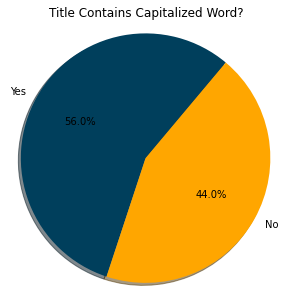

In [ ]:
# how many trending videos contain capitalized words in their titles.
#
# create a function to split the words and check if there are uppercases or lowercases.
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False

# create a new variable that contains only the title column that has the function applied to it.
df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)
# df['contains_capitalized']  ---> returns a boolean (T | F)
#
# calculate the values of either True or False and convert that to a dictionary
value_counts = df["contains_capitalized"].value_counts().to_dict()
# value_counts
#
plt.figure(figsize = (5,5))
plt.pie([value_counts[False], value_counts[True]], labels=['Yes', 'No'], 
           colors=['#003f5c', '#ffa600'],shadow=True, startangle=50, autopct='%1.1f%%')
plt.title('Title Contains Capitalized Word?')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

We can see that 56% of trending video titles contain at least a capitalized word.

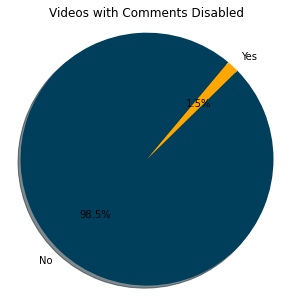

In [ ]:
value_counts_comments = df["comments_disabled"].value_counts().to_dict()


plt.figure(figsize = (5,5))
plt.pie(x=[value_counts_comments[False], value_counts_comments[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, shadow=True, startangle=50, autopct='%1.1f%%')

plt.axis('equal')
plt.title('Videos with Comments Disabled')
plt.show()

In [ ]:
df["comments_disabled"].value_counts(normalize=True)

False   0.985
True    0.015
Name: comments_disabled, dtype: float64

We see that only 1.5% of trending videos prevented users from commenting.

In [ ]:
# A counter tool is provided to support convenient and rapid tallies.
#
from collections import Counter

In [ ]:
# looking for the most common words in titles
# Counter is an unordered collection where elements are stored as Dict keys and their count as dict value.
#
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(20)

[('-', 11452),
 ('|', 10663),
 ('The', 5766),
 ('the', 3610),
 ('a', 2566),
 ('to', 2343),
 ('of', 2338),
 ('in', 2176),
 ('A', 2122),
 ('&', 2024),
 ('I', 1949),
 ('and', 1917),
 ('Video)', 1901),
 ('Trailer', 1868),
 ('How', 1661),
 ('with', 1655),
 ('2018', 1613),
 ('(Official', 1594),
 ('Official', 1554),
 ('on', 1552)]

Common words like "the" and "of" were used 5766 times and 2338 times respectively, we can see that "-" and "|" symbols occured a lot in the 40949 trending video titles: 11452 times and 10663 times respectively. We notice also that words "Video", "Trailer" and "How" are common in trending video titles.

In [ ]:
# looking for the most common words in tags
#
#
tag_words = list(df["tags"].apply(lambda x: x.split()))
tag_words = [x for y in tag_words for x in y]
Counter(tag_words).most_common(20)

[('the', 7800),
 ('to', 6878),
 ('and', 6189),
 ('of', 6008),
 ('a', 4347),
 ('in', 3068),
 ('with', 2304),
 ('on', 2173),
 ('vs', 2089),
 ('for', 1913),
 ('my', 1720),
 ('The', 1575),
 ('[none]', 1535),
 ('is', 1442),
 ('&', 1438),
 ('new', 1399),
 ('makeup', 1351),
 ('make', 1264),
 ('you', 1227),
 ('it', 1183)]

Similar to the titles section, some of the tags that were most commonly used were 'the','to','and' with 7800, 6878 and 6189 times respectively.

## Hypothesis Testing

The hypothesis statement.


> Ho = Videos released over the weekend have greater views on average than the ones released on weekdays. 

> Ha = There’s no difference in viewership between videos released on weekdays and weekends. 






###**Sampling**

I chose to use Simple Random Sampling. *Why?* Random samples are the best method of selecting your sample from the population of interest. 

**Advantages of Simple Random Sampling**


*   Lack of Bias: Each individual in the population has the same probability of being selected.
*   Simplicity: Producing a simple random sample is much less complicated than other methods as individuals in the subset are selected randomly and there are no additional steps.



In [ ]:
df_new.head()

,views,likes,dislikes,comment_count,category_id,weekday,date,time,hr,min,sec
3,343168.000,10172.000,666.000,2146.000,24,Monday,2017-11-13,11:00:04,11,0,4
5,119180.000,9763.000,511.000,1434.000,28,Monday,2017-11-13,19:07:23,19,7,23
6,2103417.000,15993.000,2445.000,1970.000,24,Sunday,2017-11-12,05:37:17,5,37,17
7,817732.000,23663.000,778.000,3432.000,28,Sunday,2017-11-12,21:50:37,21,50,37
9,256426.000,12654.000,1363.000,2368.000,25,Monday,2017-11-13,13:45:16,13,45,16


In [ ]:
# create a new dataframe of the weekend days
# weekends start friday, saturday, sunday
# filtering from the dataset where weekday == fri, sat or sun
#
ends = df_new[(df_new['weekday'] == 'Sunday') | (df_new['weekday'] == 'Saturday') | (df_new['weekday'] == 'Friday')]
ends.shape

(10217, 11)

In [ ]:
#create a new dataframe of the weekdays
# filtering from the dataset where weekday != fri, sat or sun
days = df_new[(df_new['weekday'] == 'Monday') | (df_new['weekday'] == 'Tuesday') | (df_new['weekday'] == 'Thursday') | (df_new['weekday'] == 'Wednesday')]
days.shape

(20082, 11)

In [ ]:
#taking a sample of the weekends dataframe,sample size of 200
end_sample = ends.sample(n=200)
end_sample

,views,likes,dislikes,comment_count,category_id,weekday,date,time,hr,min,sec
40806,872277.000,55898.000,913.000,5105.000,10,Friday,2018-06-08,04:00:22,4,0,22
12982,1292218.000,49464.000,709.000,2704.000,28,Sunday,2018-01-14,03:41:09,3,41,9
20368,951271.000,8067.000,677.000,739.000,25,Friday,2018-02-16,01:00:05,1,0,5
24909,1025238.000,35362.000,467.000,1410.000,10,Friday,2018-03-09,10:00:08,10,0,8
2848,364786.000,13622.000,776.000,1747.000,26,Saturday,2017-11-25,21:00:01,21,0,1
...,...,...,...,...,...,...,...,...,...,...,...
19372,1520884.000,17200.000,939.000,1359.000,23,Saturday,2018-02-10,05:01:39,5,1,39
24348,437061.000,22452.000,212.000,1636.000,15,Sunday,2018-03-04,09:00:01,9,0,1
10497,381223.000,11674.000,208.000,1812.000,19,Sunday,2017-12-31,17:44:53,17,44,53
4689,143434.000,20383.000,157.000,766.000,23,Sunday,2017-12-03,17:48:44,17,48,44


In [ ]:
#taking a sample of the weekday dataframe,sample size of 200
day_sample = days.sample(n=200)
day_sample

,views,likes,dislikes,comment_count,category_id,weekday,date,time,hr,min,sec
8676,541396.000,19094.000,542.000,851.000,23,Thursday,2017-12-21,18:00:00,18,0,0
3006,1017187.000,28060.000,950.000,3883.000,24,Monday,2017-11-27,20:00:09,20,0,9
21453,312934.000,2679.000,99.000,280.000,28,Wednesday,2018-02-28,08:00:13,8,0,13
16030,350788.000,5254.000,2014.000,820.000,22,Thursday,2018-02-01,07:00:01,7,0,1
17275,30667.000,1470.000,115.000,241.000,28,Wednesday,2018-02-07,16:08:44,16,8,44
...,...,...,...,...,...,...,...,...,...,...,...
923,111222.000,6724.000,96.000,855.000,24,Tuesday,2017-11-14,19:48:51,19,48,51
6908,967640.000,6348.000,356.000,788.000,24,Wednesday,2017-12-13,14:12:41,14,12,41
8101,1692712.000,83803.000,2011.000,4116.000,10,Wednesday,2017-12-20,05:00:02,5,0,2
23041,755441.000,24262.000,427.000,2042.000,27,Tuesday,2018-03-06,15:30:00,15,30,0


In [ ]:
# calculating the sample means of the views.
day_mean_samp = day_sample['views'].mean()
end_mean_samp = end_sample['views'].mean()

print(f'The sample mean number of views for the weekday is {day_mean_samp}')
print(f'The sample mean number of views for the weekend is {end_mean_samp}')

The sample mean number of views for the weekday is 746961.35
The sample mean number of views for the weekend is 825613.42


In [ ]:
# calculating the pop mean of the views.
day_mean_pop = days['views'].mean()
end_mean_pop = ends['views'].mean()

print(f'The population mean number of views for the weekday is {day_mean_pop}')
print(f'The population mean number of views for the weekend is {end_mean_pop}')

The population mean number of views for the weekday is 696858.7160143412
The population mean number of views for the weekend is 745256.3370852501


In [ ]:
# calculating the standard deviation of the sample views
day_std_samp = day_sample['views'].std()
end_std_samp = end_sample['views'].std()

print(f'The sample standard deviation of views for the weekday is {day_std_samp}')
print(f'The sample standard deviation of views for the weekend is {end_std_samp}')

The sample standard deviation of views for the weekday is 816942.6410722836
The sample standard deviation of views for the weekend is 827457.2507017984


In [ ]:
# calculating the standard deviation of the population views
day_std_pop = days['views'].mean()
end_std_pop = ends['views'].mean()

print(f'The population standard deviation of views for the weekday is {day_std_pop}')
print(f'The population standard deviation of views for the weekend is {end_std_pop}')

The population standard deviation of views for the weekday is 696858.7160143412
The population standard deviation of views for the weekend is 745256.3370852501


###Test Statistic

I will be using the z-score since I have a sample that's greater than 30

> n > 30


> α = 0.05



> 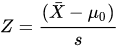










In [ ]:
# selecting the views of the weekdays and weekends.
# in order to make a comparison.
# then calculate the ztest and the p-vale.
# vdays = days['views'] ---> selects the views of the weekdays.
# vends = ends['views'] ---> selects the viewws of the weekends.
#
#
vdays = days['views']
vends = ends['views']

In [ ]:
#calcualting the z score and p value
# x1: array_like, 1-D or 2-D ---> first of the two independent samples
# x2: array_like, 1-D or 2-D ---> second of the two independent samples
# value: float --->  In the two sample case, value is the difference between mean of x1 and mean of x2 under the Null hypothesis.
# test for mean based on normal distribution, one or two samples
#
#
from statsmodels.stats import weightstats as stests #For z test calculation
# test for mean based on normal distribution, one or two samples
# In the case of two samples, the samples are assumed to be independent.

def zscore(x, y):
    ztest ,pvalue = stests.ztest(x, x2=y, value=0,alternative='two-sided') # -----> returns the p-value and the test statistic.
    print(f'The p-value is: {pvalue}')

zscore(vdays,vends)

The p-value is: 1.5788440451774486e-07


The p-value is greater than the level of significance, so I neither reject the null hypothesis nor do I accept it.

###**Conclusion**

Here are some of the conclusions we arrived at:

*   We analyzed a dataset that contains information about YouTube trending videos. The dataset was collected in **2017** and **2018**. It contains **40949** video entries.
*  Trending videos that have most views have a title length between 33 and 60 characters approximately.

*   The delimiters  **-**  and | were common in trending video titles.
*   The words 'Official', 'Video', 'Trailer' and 'How' were common also in trending video titles.

*   There is a strong positive correlation between the number of views and the number of likes of trending videos: As one of them increases, the other increases.
*   There is a moderate positive correlation also between the number of likes and the number of comments, and a slightly weaker one between the number of dislikes and the number of comments.

*   Since p-value is greater than the level of significance, so I neither reject the null hypothesis and accept the alternative hypothesis, There’s no difference in the number of views between videos released on weekdays and weekends.







